## Analysis of XRP data based on rolling averages

In [1]:
import pandas as pd
import numpy as np

In [2]:
XRP_increase = pd.read_csv("XRP_NEW_3.csv")

c:\users\zhen\appdata\local\programs\python\python37\lib\site-packages\IPython\core\interactiveshell.py:3044: DtypeWarning: Columns (14,15,16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
XRP_decrease = pd.read_csv("XRP_NEW_decrease_stats.csv")

In [4]:
try:
    del XRP_increase['Decrease_15_percent']
except:
    print('Not found')

In [5]:
[d for d in XRP_increase.columns if '_percent' in d]

['Increase_1_percent',
 'Increase_2_percent',
 'Increase_3_percent',
 'Increase_4_percent',
 'Increase_5_percent',
 'Increase_6_percent',
 'Increase_8_percent',
 'Increase_10_percent',
 'Increase_15_percent']

In [6]:
[d for d in XRP_decrease.columns if '_percent' in d]

['Decrease_1_percent',
 'Decrease_2_percent',
 'Decrease_3_percent',
 'Decrease_4_percent',
 'Decrease_5_percent',
 'Decrease_6_percent',
 'Decrease_8_percent',
 'Decrease_9_percent',
 'Decrease_10_percent',
 'Decrease_15_percent']

In [7]:
list(np.intersect1d(XRP_decrease.columns,XRP_increase.columns))

['12H_RA_on_Close',
 '168H_RA_on_Close',
 '24H_RA_on_Close',
 'Unnamed: 0',
 'Unnamed: 0.1',
 'close',
 'date',
 'datetime_real',
 'high',
 'low',
 'open',
 'quoteVolume',
 'volume',
 'weightedAverage']

In [8]:
intersect_columns = [d for d in np.intersect1d(XRP_decrease.columns,XRP_increase.columns) if d not in ['Unnamed: 0','Unnamed: 0.1']]

In [9]:
XRP_in1_de1 = XRP_increase[intersect_columns + ['Increase_1_percent']]

In [11]:
XRP_in1_de1 = XRP_in1_de1.merge(XRP_decrease[['date','Decrease_1_percent']], on='date',how = 'left')

## XRP_in1_de1

In [14]:
XRP_in1_de1.head()

,12H_RA_on_Close,168H_RA_on_Close,24H_RA_on_Close,close,date,datetime_real,high,low,open,quoteVolume,volume,weightedAverage,Increase_1_percent,Decrease_1_percent
0,NaN,NaN,NaN,0.024997,1424462400,2015-02-20 20:00:00,0.024997,0.024997,0.024997,0.1467,0.003667,0.024997,1455001200,1424464200
1,NaN,NaN,NaN,0.024997,1424464200,2015-02-20 20:30:00,0.024997,0.024997,0.024997,0.0000,0.000000,0.024997,1455001200,1424466000
2,NaN,NaN,NaN,0.024997,1424466000,2015-02-20 21:00:00,0.024997,0.024997,0.024997,0.0000,0.000000,0.024997,1455001200,1424467800
3,NaN,NaN,NaN,0.024997,1424467800,2015-02-20 21:30:00,0.024997,0.024997,0.024997,0.0000,0.000000,0.024997,1455001200,1424469600
4,NaN,NaN,NaN,0.024997,1424469600,2015-02-20 22:00:00,0.024997,0.024997,0.024997,0.0000,0.000000,0.024997,1455001200,1424471400


In [15]:
from matplotlib.pylab import rcParams 

In [16]:
rcParams['figure.figsize'] = 20,10

In [17]:
# XRP_in1_de1['1H_RA_on_Close'] = XRP_in1_de1['close'].rolling(2).mean()
XRP_in1_de1['2H_RA_on_Close'] = XRP_in1_de1['close'].rolling(2*2).mean()
# XRP_in1_de1['4H_RA_on_Close'] = XRP_in1_de1['close'].rolling(2*2).mean()
# XRP_in1_de1['8H_RA_on_Close'] = XRP_in1_de1['close'].rolling(2*2).mean()
# XRP_in1_de1['12H_RA_on_Close'] = XRP_in1_de1['close'].rolling(2*2).mean()

####  2H rolling seems okay

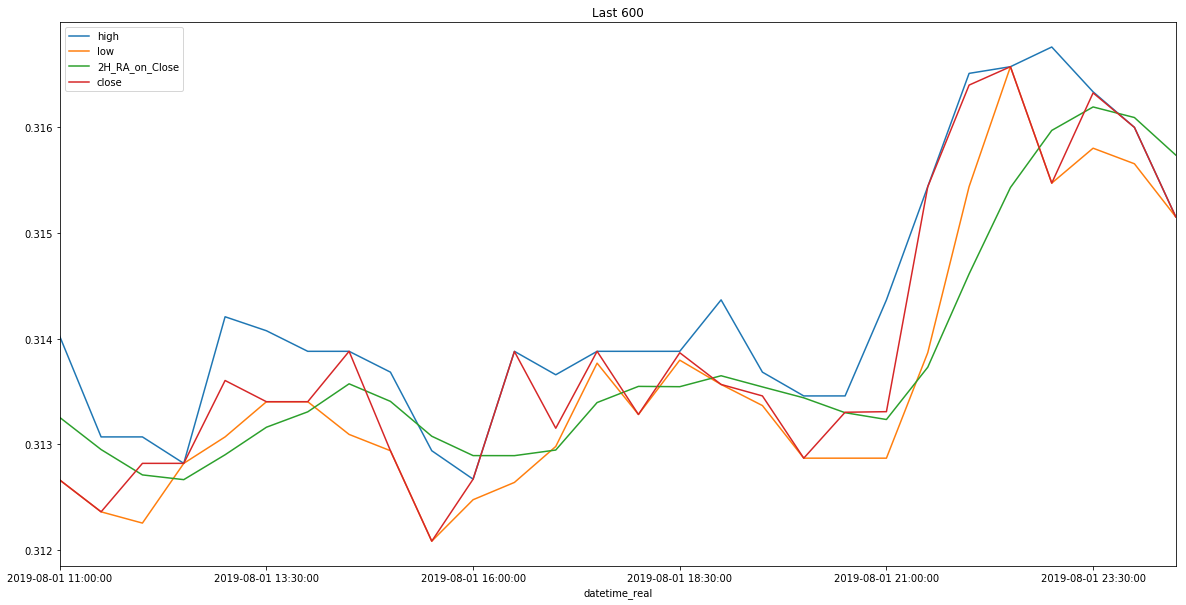

In [64]:
XRP_in1_de1[['high','low','2H_RA_on_Close','close','datetime_real']][-28:].set_index('datetime_real').plot(title = '{}'.format('Last 600'))

In [58]:
XRP_in1_de1[-28:]['high'].max()

0.31676036

In [55]:
0.31208458

0.31208458

In [60]:
(0.31676036 - 0.31208458)/0.31208458

0.014982412780535387

In [110]:
test_code = XRP_in1_de1[-148:]

In [111]:
def percent_change(percent,date_of_event, value_compare_to, direction, data_supplied ):
    
    
    XRP_Data = data_supplied
    
    "next time it was increased by {0}%".format(percent)
    #print(date_of_event)
    if direction.lower() == 'increase':
        change = value_compare_to* (1+ percent*0.01)
        
        if len(XRP_Data[(XRP_Data['date'] > date_of_event) & (XRP_Data['high'] >= change) ]) == 0:
            return 3456789123
        else:
            return XRP_Data[(XRP_Data['date'] > date_of_event) & (XRP_Data['high'] >= change) ].iloc[[0]]['date'].values[0]
    
    else:
        change = value_compare_to* (1- percent*0.01)
        
        if len(XRP_Data[(XRP_Data['date'] > date_of_event) & (XRP_Data['low'] <= change) ]) == 0:
            return 3456789123
        else:
            return XRP_Data[(XRP_Data['date'] > date_of_event) & (XRP_Data['low'] <= change) ].iloc[[0]]['date'].values[0]

In [112]:
test_code['Increase_1_percent'] = test_code.apply(lambda x : percent_change(1, x['date'], x['low'], 'increase',test_code ), axis = 1)
test_code['Decrease_1_percent'] = test_code.apply(lambda x : percent_change(1, x['date'], x['low'], 'decrease',test_code ), axis = 1)

c:\users\zhen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
c:\users\zhen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [114]:
test_code[test_code['Increase_1_percent'] < test_code['Decrease_1_percent']]

,12H_RA_on_Close,168H_RA_on_Close,24H_RA_on_Close,close,date,datetime_real,high,low,open,quoteVolume,volume,weightedAverage,Increase_1_percent,Decrease_1_percent,2H_RA_on_Close
77587,0.309781,0.313094,0.310394,0.310124,1564437600,2019-07-29 23:00:00,0.310124,0.310124,0.310124,64.490000,19.999885,0.310124,1564482600,3456789123,0.310363
77588,0.309887,0.313064,0.310353,0.310124,1564439400,2019-07-29 23:30:00,0.310124,0.310124,0.310124,33.000000,10.234092,0.310124,1564482600,3456789123,0.310288
77589,0.309956,0.313031,0.310379,0.310249,1564441200,2019-07-30 00:00:00,0.310249,0.310249,0.310249,239.395000,74.272155,0.310249,1564482600,3456789123,0.310155
77590,0.310045,0.312997,0.310347,0.310000,1564443000,2019-07-30 00:30:00,0.310000,0.309362,0.309362,606.579277,187.912042,0.309790,1564482600,3456789123,0.310124
77591,0.310145,0.312970,0.310315,0.310000,1564444800,2019-07-30 01:00:00,0.310000,0.310000,0.310000,0.000000,0.000000,0.310000,1564482600,3456789123,0.310093
77592,0.310130,0.312947,0.310264,0.310000,1564446600,2019-07-30 01:30:00,0.310000,0.310000,0.310000,0.000000,0.000000,0.310000,1564482600,3456789123,0.310062
77593,0.310115,0.312923,0.310219,0.310000,1564448400,2019-07-30 02:00:00,0.310000,0.310000,0.310000,0.000000,0.000000,0.310000,1564482600,3456789123,0.310000
77594,0.310065,0.312901,0.310174,0.310000,1564450200,2019-07-30 02:30:00,0.310000,0.310000,0.310000,0.000000,0.000000,0.310000,1564482600,3456789123,0.310000
77595,0.309968,0.312870,0.310121,0.308656,1564452000,2019-07-30 03:00:00,0.308762,0.308133,0.308762,145.142542,44.726820,0.308158,1564482600,3456789123,0.309664
77596,0.309906,0.312836,0.310045,0.307873,1564453800,2019-07-30 03:30:00,0.308868,0.307873,0.308868,38.502000,11.885572,0.308700,1564470000,3456789123,0.309132


In [41]:
df_XRP_in1_de1 = XRP_in1_de1[['high','low','close','datetime_real','2H_RA_on_Close','Increase_1_percent','Decrease_1_percent']]

In [42]:
df_XRP_in1_de1['Increase_1_percent'] = pd.to_numeric(df_XRP_in1_de1['Increase_1_percent'].replace('Not Found',3456789123))

c:\users\zhen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [43]:
df_XRP_in1_de1['Decrease_1_percent'] = pd.to_numeric(df_XRP_in1_de1['Decrease_1_percent'].replace('Not Found',3456789123))

c:\users\zhen\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
# get winning trades (where increase 1 before decrease 1%)
df_XRP_in1_de1[df_XRP_in1_de1['Increase_1_percent'] < df_XRP_in1_de1['Decrease_1_percent']]

,high,low,close,datetime_real,2H_RA_on_Close,Increase_1_percent,Decrease_1_percent


In [48]:
df_XRP_in1_de1

,high,low,close,datetime_real,2H_RA_on_Close,Increase_1_percent,Decrease_1_percent
0,0.024997,0.024997,0.024997,2015-02-20 20:00:00,NaN,1455001200,1424464200
1,0.024997,0.024997,0.024997,2015-02-20 20:30:00,NaN,1455001200,1424466000
2,0.024997,0.024997,0.024997,2015-02-20 21:00:00,NaN,1455001200,1424467800
3,0.024997,0.024997,0.024997,2015-02-20 21:30:00,0.024997,1455001200,1424469600
4,0.024997,0.024997,0.024997,2015-02-20 22:00:00,0.024997,1455001200,1424471400
5,0.024997,0.024997,0.024997,2015-02-20 22:30:00,0.024997,1455001200,1424473200
6,0.024997,0.024997,0.024997,2015-02-20 23:00:00,0.024997,1455001200,1424475000
7,0.024997,0.024997,0.024997,2015-02-20 23:30:00,0.024997,1455001200,1424476800
8,0.024997,0.024997,0.024997,2015-02-21 00:00:00,0.024997,1455001200,1424478600
9,0.024997,0.024997,0.024997,2015-02-21 00:30:00,0.024997,1455001200,1424480400
